# Introduction

Text information is one of the main types of information in modern society. Due to a leap in technological development in recent decades and a massive increase of the amount of data, many applications, such as information retrieval, recommender systems development, medical records analysis, spam filtering, spell checking, require automation. The detailed analysis of text data implies natural language understanding which is a complex task for the algorithms of automatic text processing. However, machine learning can offer a number of techniques to construct qualitative models.

The goal of this project is to propose a solution to the problem of binary classification of sports articles by objectivity using Data Science techniques. The problem of distinguishing subjective articles from the objective ones is a serious issue in terms of sports betting [[1]](https://www.researchgate.net/profile/Yara_Rizk/publication/325248671_A_Subjectivity_Classification_Framework_for_Sports_Articles_using_Improved_Cortical_Algorithms/links/5affe6e90f7e9be94bd7fce0/A-Subjectivity-Classification-Framework-for-Sports-Articles-using-Improved-Cortical-Algorithms.pdf), which is getting even bigger with the rise of the online sports. When a person who wants to make a bet is looking for the useful information in sports articles, she may suffer from the irrelevant ones, when the author somehow states her opinion instead of staying completely objective, and it may have some influence on the behaviour of the better, subconsiously or not. However, classification by objectivity might imply some professional linguistic skills, so it can be a difficult task to a regular human being. So, here is where Machine Learning methods come to help. Correctly constructed ML models can identify very complex patterns in the data, which is an essential property in this task. Using them, it may become possible to increase a quality of recognizing subjective articles automatically, helping regular betters with saving their many and filtering out irrelevant information.

Finally, it is also worth noting that this idea may be expanded to the news in general, so that it may be possible to do a binary classification of news articles by objectivity. It may be helpful in identifying "fake news" which may provide a misleading information to the big groups of people.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
from xml.sax import ContentHandler, parse

stemmer = SnowballStemmer('english', ignore_stopwords=True)
stop = set(stopwords.words('english'))

%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

It was inconvenient to work with .xls, so we had to transform it to .csv. Also there was some text preprocessing (tokenization, stemming, non-letter symbols and stopwords removal) in order to do feature extraction and deep learning based on texts.

In [2]:
%%time

# Reference https://goo.gl/KaOBG3
class ExcelHandler(ContentHandler):
    def __init__(self):
        self.chars = [  ]
        self.cells = [  ]
        self.rows = [  ]
        self.tables = [  ]
    def characters(self, content):
        self.chars.append(content)
    def startElement(self, name, atts):
        if name=="Cell":
            self.chars = [  ]
        elif name=="Row":
            self.cells=[  ]
        elif name=="Table":
            self.rows = [  ]
    def endElement(self, name):
        if name=="Cell":
            self.cells.append(''.join(self.chars))
        elif name=="Row":
            self.rows.append(self.cells)
        elif name=="Table":
            self.tables.append(self.rows)

excelHandler = ExcelHandler()
parse('features.xls', excelHandler)
features = pd.DataFrame(excelHandler.tables[0][1:], columns=excelHandler.tables[0][0])
# objective = 0, subjective = 1
y = np.where(features['Label'] == 'objective', 0, 1)

texts = []
preprocessed_texts = []

for i in range(1, 1001):
    if i // 10 == 0:
        number = '000' + str(i)
    elif i // 100 == 0:
        number = '00' + str(i)
    elif i // 1000 == 0:
        number = '0' + str(i)
    else:
        number = '1000'
    
    f = open('Raw_data/Text' + number + '.txt', 'r', encoding='latin-1')
    text = f.read()
    preprocessed_text = ' '.join([stemmer.stem(w) for w in word_tokenize(text) if (w.isalpha() and w not in stop)])
    texts.append(text)
    preprocessed_texts.append(preprocessed_text)

data = pd.DataFrame({'texts': np.array(texts), 'preprocessed_texts': np.array(preprocessed_texts), 'label': y})
objective_texts = ' '.join(data[data['label'] == 0]['preprocessed_texts'].tolist())
subjective_texts = ' '.join(data[data['label'] == 1]['preprocessed_texts'].tolist())

Wall time: 14.5 s


# how the data looks like

Objective text example:

In [9]:
texts[0]

'Finalists in the Apertura play-offs, Toluca had drawn their first two Clausura games but got off to a good start when Edgar Benitez put them ahead in the 16th minute.\nMatias Britos levelled 20 minutes later but Lucas Silva netted 14 minutes from the end to ensure the visitors took all three points.\n  \tFranco Arizala scored 13 minutes from time to ensure Jaguares claimed their first point with a 1-1 draw against Monterrey, who had opened the scoring through Aldo De Nigris (14).\n Hosts Jaguares also had Jorge Rodriguez sent off in the closing moments.'

In [10]:
preprocessed_texts[0]

'finalist apertura toluca drawn first two clausura game got good start edgar benitez put ahead minut matia brito level minut later luca silva net minut end ensur visitor took three point franco arizala score minut time ensur jaguar claim first point draw monterrey open score aldo de nigri host jaguar also jorg rodriguez sent close moment'

Subjective text example:

In [26]:
texts[938]

'BARCELONA star Dani Alves has claimed Arsenal\'s Jack Wilshere can be as good as superstars Xavi and Andres Iniesta.\n\nThe Brazilian recently played against Wilshere in a friendly clash with England.\n\nAnd Alves was so impressed with the midfielder\'s performance, he has urged Barca chiefs to bid for the 21-year-old this summer.\n\n"He is a great player who we have met playing against Arsenal and without doubt he can reach the height of the players we have here at Barcelona like Xavi and Iniesta," he said.\n\nArsenal have lost stars Cesc Fabregas and Alex Song to the Spanish league leaders over the past two summers.\n\nAnd boss Arsene Wenger will be bracing himself for new attempts from Barca to nick his latest midfield linchpin.\n\n"[Wilshere] has a lot of quality and a great personality. If I was given the chance to choose, he is a player that I would sign for Barcelona," added Alves. '

In [27]:
preprocessed_texts[938]

'barcelona star dani alv claim arsenal jack wilsher good superstar xavi andr iniesta the brazilian recent play wilsher friend clash england and alv impress midfield perform urg barca chief bid summer he great player met play arsenal without doubt reach height player barcelona like xavi iniesta said arsenal lost star cesc fabrega alex song spanish leagu leader past two summer and boss arsene wenger brace new attempt barca nick latest midfield linchpin wilsher lot qualiti great person if i given chanc choos player i would sign barcelona ad alv'

# label distribution

There is no strong imbalance of classes:

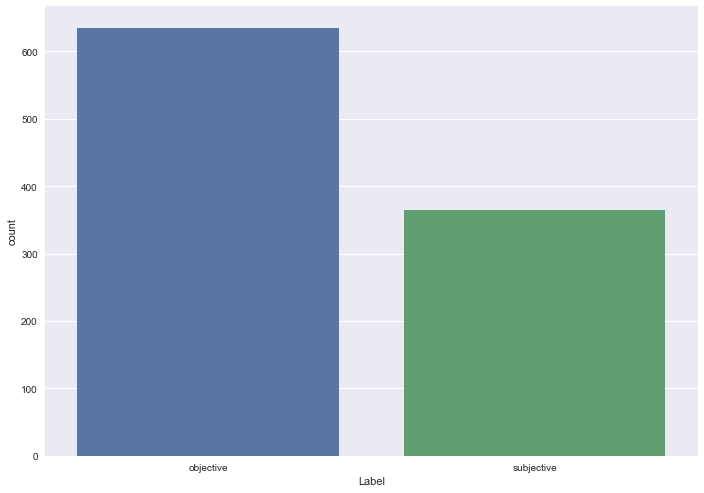

In [3]:
sns.countplot(x='Label', data=features);

# Wordclouds

Let's look at the wordclouds for objective and subjective texts.

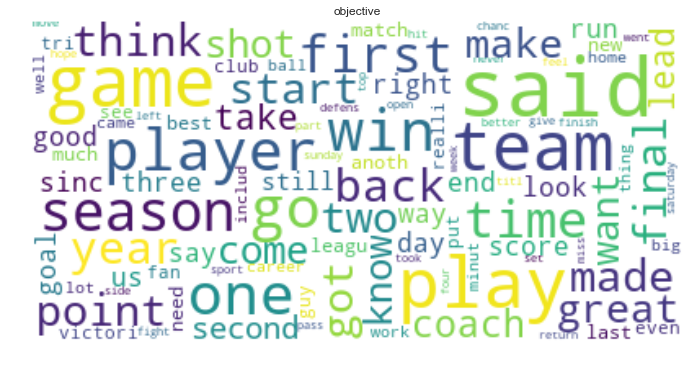

In [4]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(objective_texts)
plt.figure(figsize=(16, 6))
plt.title('objective')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
#wordcloud.to_file("img/first_review.png")

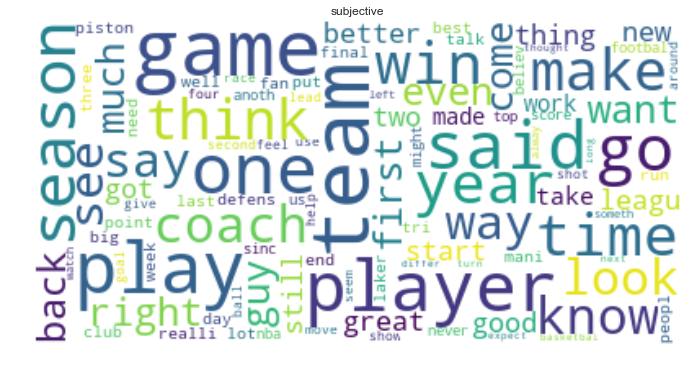

In [5]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(subjective_texts)
plt.figure(figsize=(16, 6))
plt.title('subjective')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# wordcounts

Following the idea of wordclouds, we plot word frequencies.

### before preprocessing

In [89]:
%%time
obj_texts_words = np.array(' '.join([' '.join([w for w in word_tokenize(text) if w.isalpha()]) for text in texts[:635]]).split())
obj_words_count = pd.value_counts(obj_texts_words)
subj_texts_words = np.array(' '.join([' '.join([w for w in word_tokenize(text) if w.isalpha()]) for text in texts[635:]]).split())
subj_words_count = pd.value_counts(subj_texts_words)

Wall time: 4.11 s


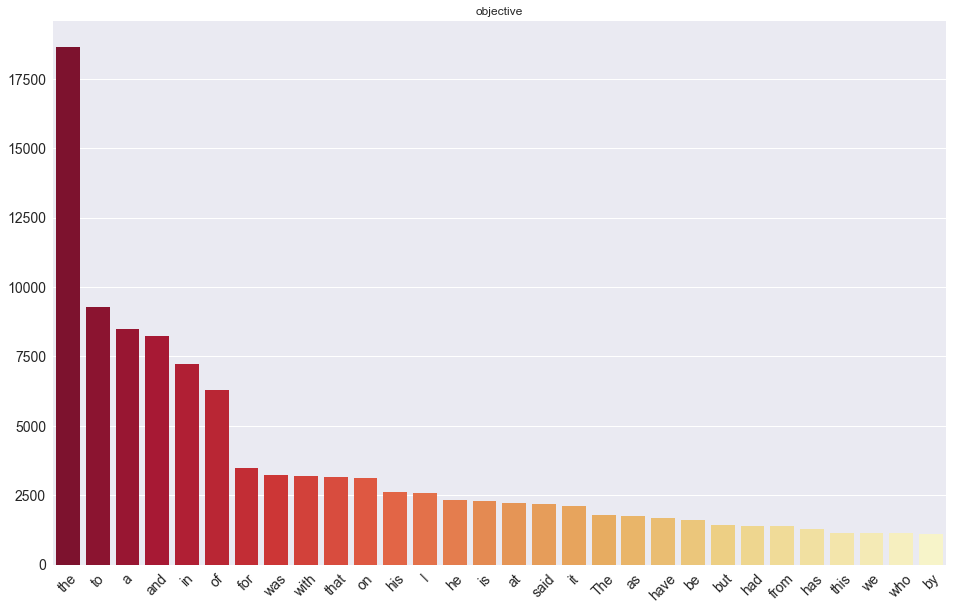

In [90]:
plt.figure(figsize=(16, 10))
sns.barplot(x=obj_words_count[:30].index, y=obj_words_count[:30].values, palette='YlOrRd_r')
plt.xticks(size=14, rotation=45)
plt.yticks(size=14)
plt.title('objective')
plt.show()

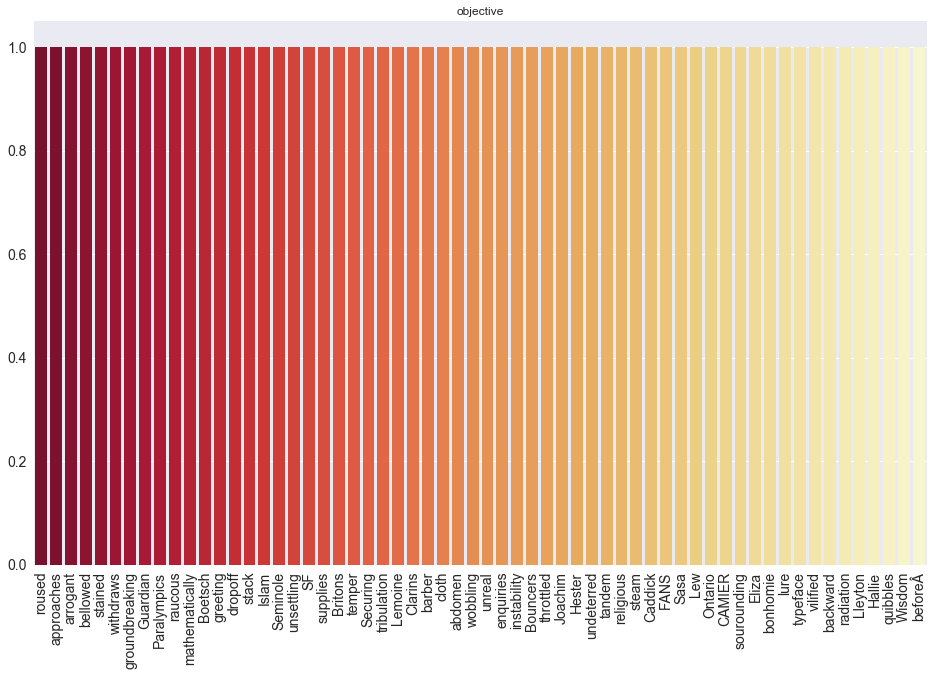

In [96]:
plt.figure(figsize=(16, 10))
sns.barplot(x=obj_words_count[-60:].index, y=obj_words_count[-60:].values, palette='YlOrRd_r')
plt.xticks(size=14, rotation=90)
plt.yticks(size=14)
plt.title('objective')
plt.show()

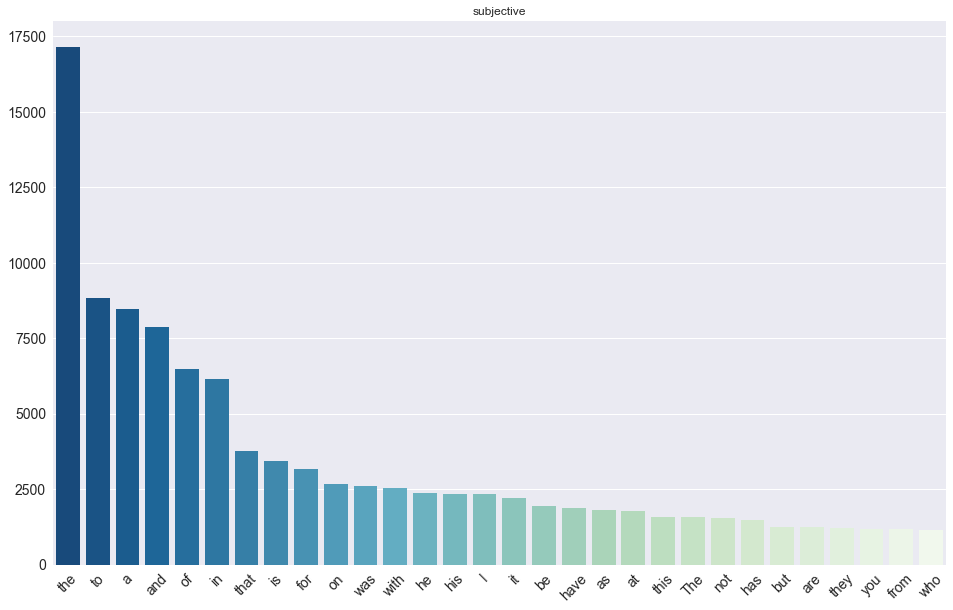

In [97]:
plt.figure(figsize=(16, 10))
sns.barplot(x=subj_words_count[:30].index, y=subj_words_count[:30].values, palette='GnBu_r')
plt.xticks(size=14, rotation=45)
plt.yticks(size=14)
plt.title('subjective')
plt.show()

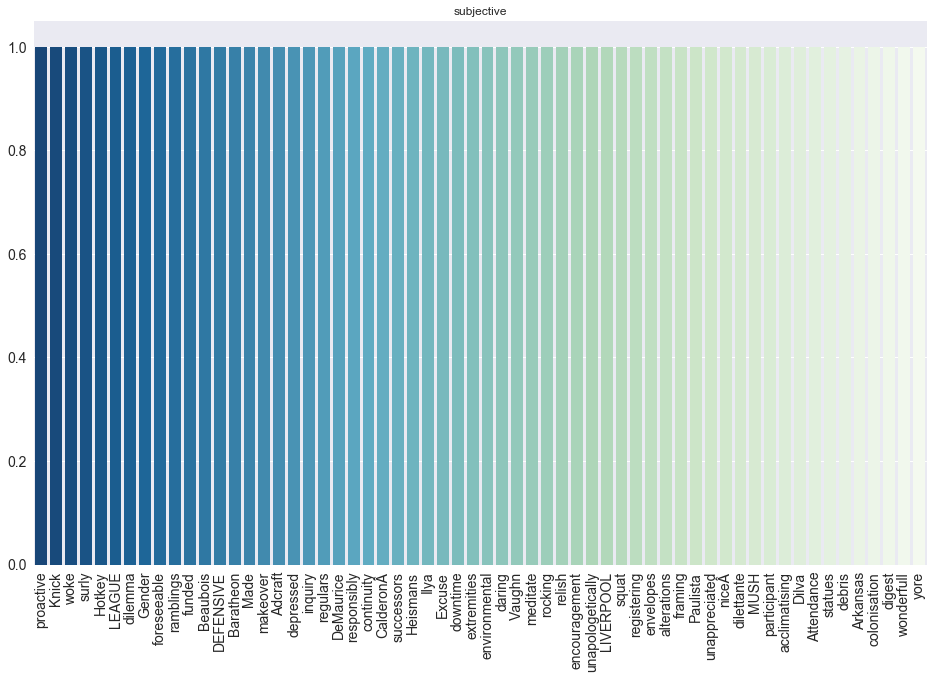

In [98]:
plt.figure(figsize=(16, 10))
sns.barplot(x=subj_words_count[-60:].index, y=subj_words_count[-60:].values, palette='GnBu_r')
plt.xticks(size=14, rotation=90)
plt.yticks(size=14)
plt.title('subjective')
plt.show()

### after preprocessing

In [99]:
%%time
obj_texts_words = np.array(' '.join([' '.join([w for w in text.split()]) for text in preprocessed_texts[:635]]).split())
obj_words_count = pd.value_counts(obj_texts_words)
subj_texts_words = np.array(' '.join([' '.join([w for w in text.split()]) for text in preprocessed_texts[635:]]).split())
subj_words_count = pd.value_counts(subj_texts_words)

Wall time: 191 ms


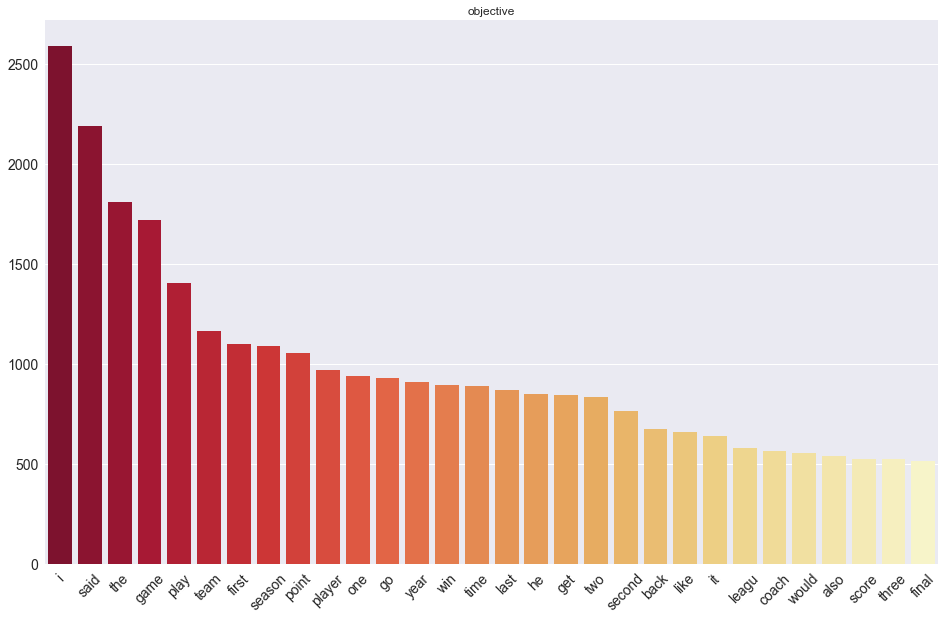

In [100]:
plt.figure(figsize=(16, 10))
sns.barplot(x=obj_words_count[:30].index, y=obj_words_count[:30].values, palette='YlOrRd_r')
plt.xticks(size=14, rotation=45)
plt.yticks(size=14)
plt.title('objective')
plt.show()

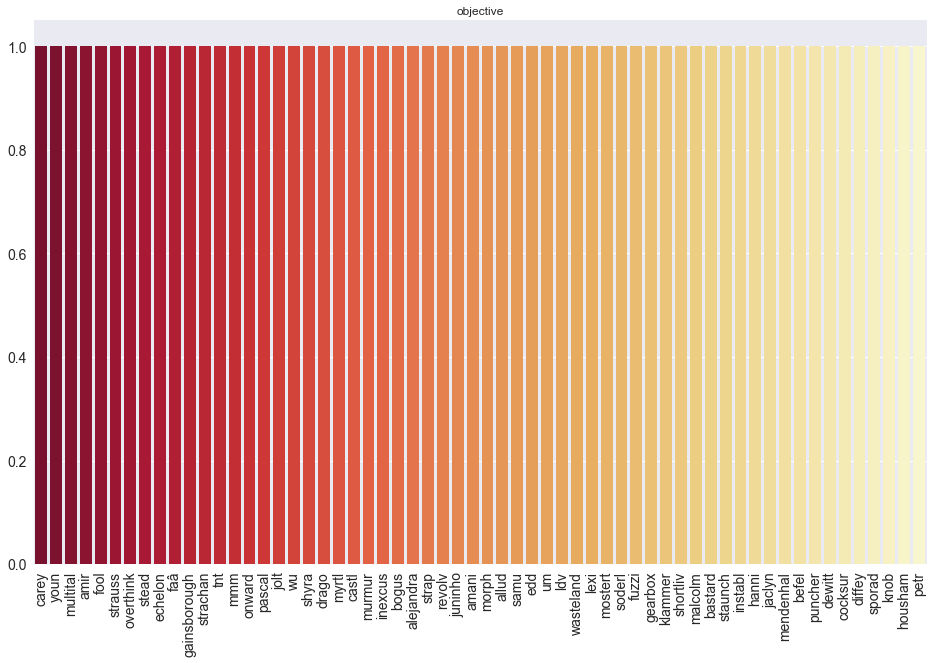

In [101]:
plt.figure(figsize=(16, 10))
sns.barplot(x=obj_words_count[-60:].index, y=obj_words_count[-60:].values, palette='YlOrRd_r')
plt.xticks(size=14, rotation=90)
plt.yticks(size=14)
plt.title('objective')
plt.show()

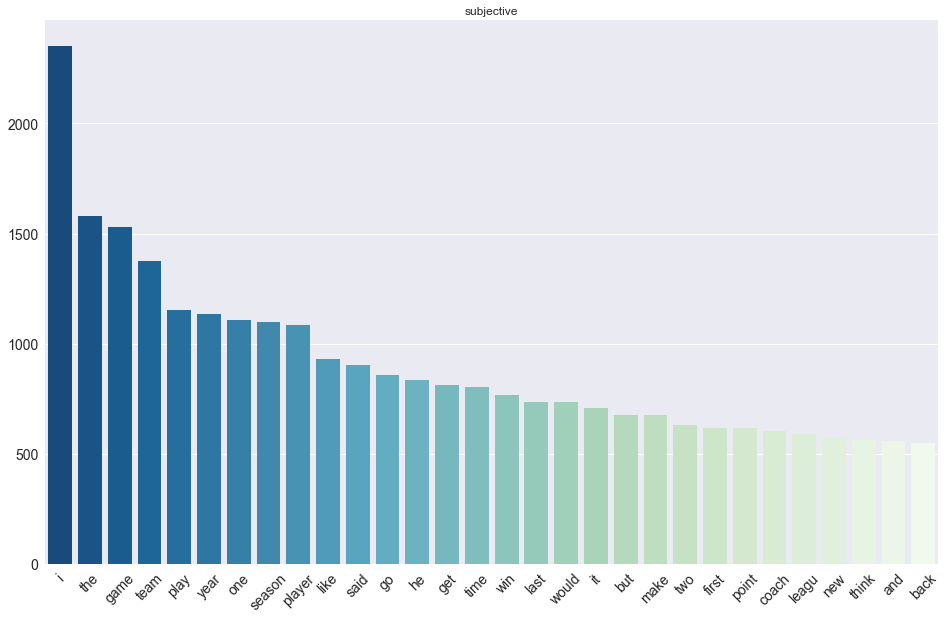

In [102]:
plt.figure(figsize=(16, 10))
sns.barplot(x=subj_words_count[:30].index, y=subj_words_count[:30].values, palette='GnBu_r')
plt.xticks(size=14, rotation=45)
plt.yticks(size=14)
plt.title('subjective')
plt.show()

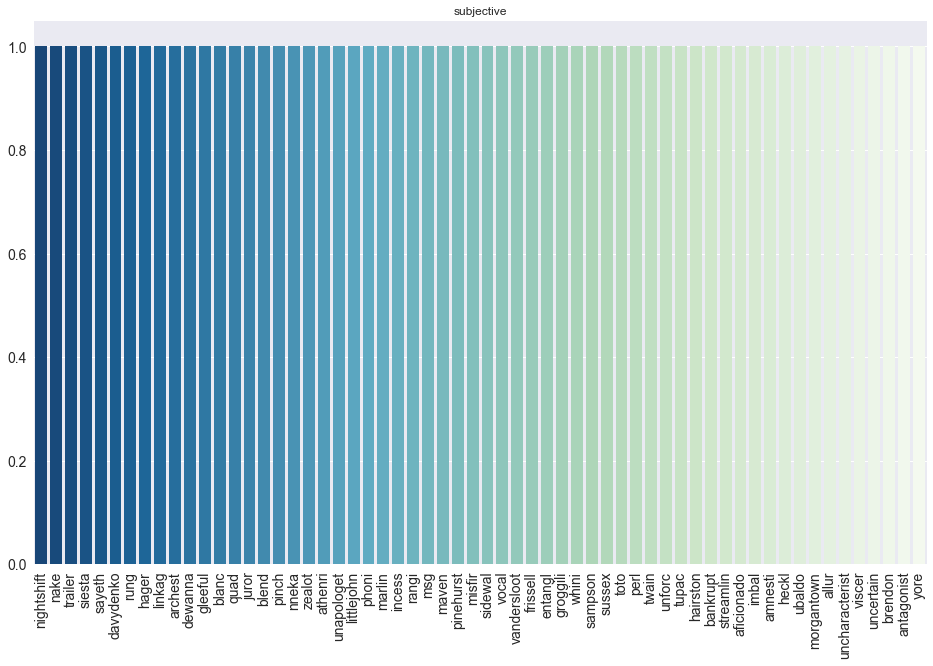

In [103]:
plt.figure(figsize=(16, 10))
sns.barplot(x=subj_words_count[-60:].index, y=subj_words_count[-60:].values, palette='GnBu_r')
plt.xticks(size=14, rotation=90)
plt.yticks(size=14)
plt.title('subjective')
plt.show()

It is noticeable that the method of distinguishing the classes based on word frequencies is not evident.

# TF-IDF

Also, we may look at TF-IDF instead of word frequencies.

In [34]:
vectorizer = TfidfVectorizer(min_df=5, max_features=1000, ngram_range=(1, 1))
vz = vectorizer.fit_transform(list(data['preprocessed_texts']))
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [35]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
the,1.126563
one,1.357674
said,1.361969
time,1.388134
game,1.411980
play,1.424120
first,1.441056
last,1.445725
year,1.451985
season,1.458284


In [36]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(10)

,tfidf
tebow,5.343805
griner,5.269697
buss,5.200705
fantasi,5.136166
pioli,5.136166
armstrong,5.136166
seau,5.136166
ufc,5.075541
messi,5.075541
kaepernick,5.018383
